In [108]:
# Load libraries
import numpy as np # Math
import pandas as pd
import sklearn.neighbors, sklearn.linear_model, sklearn.ensemble, sklearn.naive_bayes # Baseline classification techniques
import matplotlib.pyplot as plt
import time
import warnings


from sklearn import preprocessing
from scipy.stats import mode
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
warnings.filterwarnings('ignore')


# Supervised Machine Learning 

This notebook uses the features extracted in the *CompletedSongExtraction* notebook to perform Multinomial Song Genre Classification. 

1. Import and do high level verification check of dataset
2. Exploratory Data Analysis
3. Machine Learning on Song Segments
4. Parameter Tuning


# 1. Data Importation and Verification
- Import datase that was prepared in the Completed Extraction Notebook 
- check for null values and rows with all zeroes
- Retrieve high level statistical properties

In [4]:
#import cleaned data set
df = pd.read_csv("CompleteFeatureExtraction.csv",index_col=0) 
print(df.shape)


(40000, 57)


This is a vague check to make sure that each line is different from the next especially at the boundaries of the segments 

In [5]:
df.head(15)

,Zero Crossing Rate,Number of Onsets,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,...,mfcc_kurtosis_10,mfcc_kurtosis_11,mfcc_kurtosis_12,spectral_centroid_mean,spectral_centroid_var,spectral_centroid_skew,spectral_centroid_kurtosis,Encoded_Genre,Genre,Train
0,2157.0,10.0,-160.973272,184.320385,-22.985395,39.527404,-9.813770,15.310525,-13.843877,17.804084,...,-0.220679,0.024465,1.197027,968.625640,275094.428012,1.173542,1.921552,0,Electronic,True
1,2570.0,9.0,-160.344057,184.074794,-23.322441,39.534971,-9.647739,15.304824,-13.893123,18.174114,...,-0.264739,0.071246,0.939847,1270.389393,17999.842129,0.596692,0.692742,0,Electronic,True
2,3143.0,8.0,-160.058394,183.666478,-23.374013,39.374805,-10.326398,15.310107,-13.971265,17.986350,...,0.110875,-0.089481,0.362001,1561.206407,160435.404399,1.592194,2.524688,0,Electronic,True
3,5374.0,12.0,-159.891569,183.892191,-22.914240,39.327850,-10.551005,15.471867,-14.188831,17.773913,...,-0.204822,-0.159536,0.222453,1834.602074,395308.340084,4.248760,17.500982,0,Electronic,True
4,5665.0,9.0,-159.699858,184.313259,-23.128340,39.072852,-10.387527,15.084918,-14.113351,17.761934,...,0.284749,-0.282557,0.697686,2275.671978,419006.552103,1.792972,3.456450,0,Electronic,True
5,4233.0,4.0,-160.589245,183.759895,-23.468740,39.312662,-10.234623,15.016939,-14.151684,17.522570,...,-0.091316,-0.310369,0.003197,1809.791628,161102.086831,1.506138,2.491702,0,Electronic,True
6,4821.0,11.0,-160.895901,183.915729,-23.325363,39.476560,-10.075741,15.213195,-14.231476,17.504163,...,-0.256187,0.108071,-0.085270,2009.890048,675295.243375,2.075374,3.444626,0,Electronic,True
7,4983.0,9.0,-160.699118,184.131995,-23.627454,39.175700,-9.998731,15.218191,-14.267469,17.632736,...,0.140867,0.028676,-0.283043,2059.340694,201868.693865,1.439725,2.127228,0,Electronic,True
8,3981.0,8.0,-160.447509,184.006099,-23.931341,39.172532,-9.926407,15.136880,-13.970451,17.717359,...,-0.040837,0.373075,-0.273164,1652.638550,89947.499656,2.369875,7.694625,0,Electronic,True
9,6495.0,13.0,-160.260212,183.769066,-23.758201,39.398229,-9.964494,15.251964,-14.074251,17.797812,...,-0.228240,0.183637,-0.198983,2109.934419,476283.345930,2.203267,5.244489,0,Electronic,True


We verify that there are no null values as some scikit learn algorithms crash otherwise

In [6]:
df.isnull().any()

Zero Crossing Rate            False
Number of Onsets              False
mfcc_mean_1                   False
mfcc_mean_2                   False
mfcc_mean_3                   False
mfcc_mean_4                   False
mfcc_mean_5                   False
mfcc_mean_6                   False
mfcc_mean_7                   False
mfcc_mean_8                   False
mfcc_mean_9                   False
mfcc_mean_10                  False
mfcc_mean_11                  False
mfcc_mean_12                  False
mfcc_var_1                    False
mfcc_var_2                    False
mfcc_var_3                    False
mfcc_var_4                    False
mfcc_var_5                    False
mfcc_var_6                    False
mfcc_var_7                    False
mfcc_var_8                    False
mfcc_var_9                    False
mfcc_var_10                   False
mfcc_var_11                   False
mfcc_var_12                   False
mfcc_skew_1                   False
mfcc_skew_2                 

Remove any rows with all zeroes

In [7]:
df = df.loc[~df.apply(lambda row: (row==0).all(), axis=1)]

Retrieve high level statistical properties of the data set to check for glaring errors

In [8]:
df.describe()

,Zero Crossing Rate,Number of Onsets,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,...,mfcc_kurtosis_8,mfcc_kurtosis_9,mfcc_kurtosis_10,mfcc_kurtosis_11,mfcc_kurtosis_12,spectral_centroid_mean,spectral_centroid_var,spectral_centroid_skew,spectral_centroid_kurtosis,Encoded_Genre
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,4340.028900,12.647700,-178.961149,154.221790,-25.987973,29.523120,-0.421192,14.786920,-7.119779,5.571237,...,0.093536,0.050203,0.106709,0.100901,0.125434,1754.331479,287090.526567,1.898904,4.707554,4.500000
std,1329.322053,6.958322,92.440643,32.861457,28.672637,30.132417,14.023414,14.457333,11.322751,12.294674,...,0.638210,0.583301,0.611725,0.593347,0.597938,384.704363,191427.365976,0.925942,4.650425,2.872317
min,0.000000,0.000000,-678.613854,0.000000,-157.663119,-95.809999,-62.927152,-40.238413,-54.363258,-46.506073,...,-1.431263,-1.421251,-1.339909,-1.469778,-1.199782,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3143.000000,8.000000,-243.077109,132.734500,-46.244456,22.856943,-9.152051,8.074998,-12.727025,0.683018,...,-0.275490,-0.292665,-0.255009,-0.242055,-0.216908,1561.206407,160435.404399,1.439725,2.127228,2.000000
50%,4233.000000,13.000000,-166.549171,154.678231,-27.206540,36.726471,-0.920574,17.095726,-6.217018,7.572122,...,-0.021022,-0.053564,-0.005153,-0.006475,0.017289,1809.791628,201868.693865,1.592194,2.524688,4.500000
75%,5374.000000,17.000000,-110.717247,174.460114,-7.985151,47.222990,8.129025,24.163057,0.094128,13.464210,...,0.307768,0.252255,0.314547,0.297915,0.327194,2059.340694,419006.552103,2.203267,5.244489,7.000000
max,6495.000000,65.000000,72.935200,271.958310,90.630265,118.717905,67.294276,70.013503,44.840056,39.746901,...,14.730745,14.159145,10.140298,11.711161,18.806338,2275.671978,675295.243375,4.248760,17.500982,9.000000


In [9]:
print("Number of columns in data set is: %d"% len(df.columns))
# view columns present in data set and their names
print("The columns are:");df.columns  

Number of columns in data set is: 57
The columns are:


Index(['Zero Crossing Rate', 'Number of Onsets', 'mfcc_mean_1', 'mfcc_mean_2',
       'mfcc_mean_3', 'mfcc_mean_4', 'mfcc_mean_5', 'mfcc_mean_6',
       'mfcc_mean_7', 'mfcc_mean_8', 'mfcc_mean_9', 'mfcc_mean_10',
       'mfcc_mean_11', 'mfcc_mean_12', 'mfcc_var_1', 'mfcc_var_2',
       'mfcc_var_3', 'mfcc_var_4', 'mfcc_var_5', 'mfcc_var_6', 'mfcc_var_7',
       'mfcc_var_8', 'mfcc_var_9', 'mfcc_var_10', 'mfcc_var_11', 'mfcc_var_12',
       'mfcc_skew_1', 'mfcc_skew_2', 'mfcc_skew_3', 'mfcc_skew_4',
       'mfcc_skew_5', 'mfcc_skew_6', 'mfcc_skew_7', 'mfcc_skew_8',
       'mfcc_skew_9', 'mfcc_skew_10', 'mfcc_skew_11', 'mfcc_skew_12',
       'mfcc_kurtosis_1', 'mfcc_kurtosis_2', 'mfcc_kurtosis_3',
       'mfcc_kurtosis_4', 'mfcc_kurtosis_5', 'mfcc_kurtosis_6',
       'mfcc_kurtosis_7', 'mfcc_kurtosis_8', 'mfcc_kurtosis_9',
       'mfcc_kurtosis_10', 'mfcc_kurtosis_11', 'mfcc_kurtosis_12',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_centroid_skew', 'spectra

# 2. Exploratory Data Analysis
- Verify that there are indeed only 10 genres which are balanced and display it graphically

This allows us to check that there are indeed only 10 Genres which correspond to each of the music genres to be classified. 

In [79]:
original_encoded_order = df.Encoded_Genre.unique() 
original_encoded_order

array([2, 6, 7, 9, 3, 4, 0, 5, 1, 8])

In [81]:
original_genre_order = df.Genre.unique()
original_genre_order

array(['Hip-Hop', 'Pop', 'Psych-Rock', 'Rock', 'Indie-Rock', 'Jazz',
       'Electronic', 'Old-Time', 'Folk', 'Punk'], dtype=object)

In [10]:
df.columns

Index(['Zero Crossing Rate', 'Number of Onsets', 'mfcc_mean_1', 'mfcc_mean_2',
       'mfcc_mean_3', 'mfcc_mean_4', 'mfcc_mean_5', 'mfcc_mean_6',
       'mfcc_mean_7', 'mfcc_mean_8', 'mfcc_mean_9', 'mfcc_mean_10',
       'mfcc_mean_11', 'mfcc_mean_12', 'mfcc_var_1', 'mfcc_var_2',
       'mfcc_var_3', 'mfcc_var_4', 'mfcc_var_5', 'mfcc_var_6', 'mfcc_var_7',
       'mfcc_var_8', 'mfcc_var_9', 'mfcc_var_10', 'mfcc_var_11', 'mfcc_var_12',
       'mfcc_skew_1', 'mfcc_skew_2', 'mfcc_skew_3', 'mfcc_skew_4',
       'mfcc_skew_5', 'mfcc_skew_6', 'mfcc_skew_7', 'mfcc_skew_8',
       'mfcc_skew_9', 'mfcc_skew_10', 'mfcc_skew_11', 'mfcc_skew_12',
       'mfcc_kurtosis_1', 'mfcc_kurtosis_2', 'mfcc_kurtosis_3',
       'mfcc_kurtosis_4', 'mfcc_kurtosis_5', 'mfcc_kurtosis_6',
       'mfcc_kurtosis_7', 'mfcc_kurtosis_8', 'mfcc_kurtosis_9',
       'mfcc_kurtosis_10', 'mfcc_kurtosis_11', 'mfcc_kurtosis_12',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_centroid_skew', 'spectra

This  checks that the Genres to be classified are from a balanced dataset.

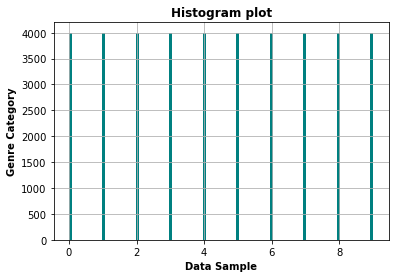

9    4000
8    4000
7    4000
6    4000
5    4000
4    4000
3    4000
2    4000
1    4000
0    4000
Name: Encoded_Genre, dtype: int64

In [11]:
df.Encoded_Genre.hist(bins=100,color='teal')
plt.title("Histogram plot",fontweight='bold');
plt.xlabel("Data Sample",fontweight='bold');
plt.ylabel("Genre Category",fontweight='bold');

plt.show()
df.Encoded_Genre.value_counts()

In [11]:
#randomise the indexes so the order is not fed into the machine learning algorithms
df = df.reindex(np.random.permutation(df.index))
df.head()

,Zero Crossing Rate,Number of Onsets,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,...,mfcc_kurtosis_10,mfcc_kurtosis_11,mfcc_kurtosis_12,spectral_centroid_mean,spectral_centroid_var,spectral_centroid_skew,spectral_centroid_kurtosis,Encoded_Genre,Genre,Train
9930,2157.0,16.0,-181.031550,103.922059,-38.711613,86.274006,-15.071908,24.131130,9.048682,10.813169,...,-0.667363,0.642528,1.378993,968.625640,275094.428012,1.173542,1.921552,2,Hip-Hop,False
26882,3143.0,16.0,-215.720885,206.106430,-33.038117,8.603437,15.960386,2.182355,2.565153,-13.643583,...,-0.507789,1.398776,-0.026719,1561.206407,160435.404399,1.592194,2.524688,6,Pop,True
31607,4983.0,10.0,-121.570742,156.470753,-43.420642,35.631985,-29.124300,28.273275,-15.043892,7.016115,...,0.122080,0.429828,0.542351,2059.340694,201868.693865,1.439725,2.127228,7,Psych-Rock,True
38214,5665.0,5.0,-160.236800,154.896801,-41.391888,80.937218,3.608994,2.075511,13.165438,4.790453,...,-0.143417,0.518606,-0.008186,2275.671978,419006.552103,1.792972,3.456450,9,Rock,False
15019,6495.0,16.0,-156.817912,162.387198,-16.909710,45.064871,19.782463,7.908994,-14.355097,8.862357,...,0.301586,-0.191963,0.520941,2109.934419,476283.345930,2.203267,5.244489,3,Indie-Rock,True


Verify that the size of the data set is unchanged after reordering

In [12]:
print("Data set shape is :" + str(df.shape))

Data set shape is :(40000, 57)


# 3. Machine Learning done on song segments


### Load all the songs from fma_small and their corresponding features (estimated and standard deviation of their zero crossing rates and from the mel spectogram)
1. X_train matrix contains the training data
2. y_train vector contains the training labels
3. X_test matrix contains the test data
4. y_test vector contains the test labels

In [13]:
df_train = df[df['Train'].values == True]  
df_test =df[df['Train'].values == False]  

out_feature_col = [col for col in df.columns if col not in ["Encoded_Genre","Genre","Train"]]

X_train = df_train.loc[:,out_feature_col]
X_test = df_test.loc[:,out_feature_col]

y_train = df_train.loc[:,'Encoded_Genre'].astype(int)
y_test = df_test.loc[:,'Encoded_Genre'].astype(int)



X_train_rows,X_train_cols = X_train.shape
X_test_rows, X_test_cols = X_test.shape
#y_train = np.reshape(y_train,(y_train.size,1))
#y_test = np.reshape(y_test,(y_test.size,1))
#y_test = np.reshape(y_test,(y_test.size,1))


print('X_train size=',X_train.shape)
print('X_test size=',X_test.shape)
print('y_train size=',y_train.shape)
print('y_test size=',y_test.shape)

#scaling between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)

X_test = min_max_scaler.transform(X_test)


X_train size= (32000, 54)
X_test size= (8000, 54)
y_train size= (32000,)
y_test size= (8000,)


# 4. Parameter Tuning 

###  Parameter Tuning for Random Forest 

In [73]:
print(__doc__)

import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 16),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X_train,y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)



Automatically created module for IPython interactive environment
RandomizedSearchCV took 272.73 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.978 (std: 0.003)
Parameters: {'criterion': 'entropy', 'bootstrap': False, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 3, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.976 (std: 0.004)
Parameters: {'criterion': 'entropy', 'bootstrap': False, 'min_samples_split': 13, 'min_samples_leaf': 5, 'max_features': 2, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.969 (std: 0.003)
Parameters: {'criterion': 'gini', 'bootstrap': True, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 10, 'max_depth': None}



### Parameter Search for Ada Boost

Automatically created module for IPython interactive environment


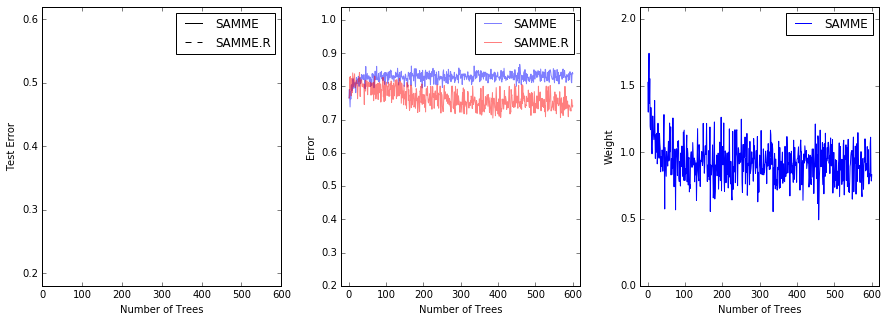

In [94]:
print(__doc__)

# Ada boost showing error plot and parameter estimation


from sklearn.externals.six.moves import zip

import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


#X, y = make_gaussian_quantiles(n_samples=13000, n_features=10,
#                               n_classes=3, random_state=1)

n_split = 3000

#X_train, X_test = X[:n_split], X[n_split:]
#y_train, y_test = y[:n_split], y[n_split:]

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='black',
         linestyle='dashed', label='SAMME.R')
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME.R', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "b", label='SAMME')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

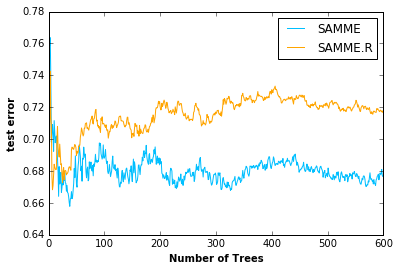

In [101]:
plt.plot(discrete_test_errors,label='SAMME',c='deepskyblue')
plt.plot(real_test_errors,label = 'SAMME.R', c= 'orange')
plt.ylabel('test error', fontweight ='bold')
plt.xlabel('Number of Trees',fontweight = 'bold')
plt.legend()
plt.show()

# Using Optimised parameters search in random forest

In [112]:
def generic_mlo():
    classifier, song_train_accuracy,song_test_accuracy,fscore_train,fscore_test ,segment_train_accuracy, segment_test_accuracy, exec_time= [],[],[],[],[], [], [], []
    

    #classifier.append(sklearn.svm.LinearSVC()) 
    #classifier.append(sklearn.linear_model.RidgeClassifier())
    #classifier.append(sklearn.ensemble.AdaBoostClassifier())
    #classifier.append(sklearn.naive_bayes.MultinomialNB())
    classifier.append(sklearn.ensemble.RandomForestClassifier(criterion='entropy', bootstrap=False, min_samples_split= 9, min_samples_leaf= 9, max_features= 30))

    for i in range(len(classifier)):
        c=classifier[i]
        t_start = time.process_time()
        c.fit(X_train, y_train)
        train_pred = c.predict(X_train)
        test_pred = c.predict(X_test)
        test_predictor.append(test_pred)
        segment_train_accuracy.append('{:5.2f}'.format(100*sklearn.metrics.accuracy_score(y_train, train_pred)))
        segment_test_accuracy.append('{:5.2f}'.format(100*sklearn.metrics.accuracy_score(y_test, test_pred)))
        fscore_train.append('{:5.2f}'.format(f1_score(y_train, train_pred, average='macro')))
        fscore_test.append('{:5.2f}'.format(f1_score(y_test, test_pred, average='macro')))

        exec_time.append('{:5.2f}'.format(time.process_time() - t_start))



    print('Song Segment train accuracy:      {}'.format(' '.join(segment_train_accuracy)))
    print('Song Segment test accuracy:       {}'.format(' '.join(segment_test_accuracy)))

    print('Execution time:              {}'.format(' '.join(exec_time)))
    
    
    #col_names = df.loc[:,out_feature_col].columns
    #col_length = len(col_names)
    #feature_importance_graph(c.feature_importances_, col_length, col_names)
    #feature_importance_graph(c.feature_importances_,len(df.loc[:,out_feature_col].columns),df.loc[:,out_feature_col].columns)
    #plt.show()
    return test_pred

In [114]:
test_pred_o = generic_mlo()

Song Segment train accuracy:      99.97
Song Segment test accuracy:       33.10
Execution time:              84.23


# Unoptimized Algorithm Run

In [26]:
def feature_importance_graph(feat_imp, col_length,col_names):
    imp_df = pd.DataFrame([feat_imp], columns = col_names)
 
    fig, ax = plt.subplots(figsize = (20,10))
    ax.bar(range(len(imp_df)), imp_df)
    ax.set_xticks(np.arange(0.4, col_length+0.4, 1))
    ax.set_xticklabels(imp_df.columns, rotation=90)

    return ax

In [27]:
def feature_importance_graph(imp, col_length, col_names):
    imp_df = pd.DataFrame([imp], columns =col_names)
  

    # graph
    fig, ax = plt.subplots(figsize = (20,10))
    ax.bar(range(len(imp)), imp)
    ax.set_xticks(np.arange(0.5, col_length+0.5, 1))
    ax.set_xticklabels(imp_df.columns, rotation=90)

In [63]:
#test_predictor=[]; # store the outcome of prediction
                       # y_test
    
def generic_ml():
    classifier, song_train_accuracy,song_test_accuracy,fscore_train,fscore_test ,segment_train_accuracy, segment_test_accuracy, exec_time= [],[],[],[],[], [], [], []
    

    classifier.append(sklearn.svm.LinearSVC()) 
    classifier.append(sklearn.linear_model.RidgeClassifier())
    classifier.append(sklearn.ensemble.AdaBoostClassifier())
    classifier.append(sklearn.naive_bayes.MultinomialNB())
    classifier.append(sklearn.ensemble.RandomForestClassifier())

    for i in range(len(classifier)):
        c=classifier[i]
        t_start = time.process_time()
        c.fit(X_train, y_train)
        train_pred = c.predict(X_train)
        test_pred = c.predict(X_test)
        test_predictor.append(test_pred)
        segment_train_accuracy.append('{:5.2f}'.format(100*sklearn.metrics.accuracy_score(y_train, train_pred)))
        segment_test_accuracy.append('{:5.2f}'.format(100*sklearn.metrics.accuracy_score(y_test, test_pred)))
        fscore_train.append('{:5.2f}'.format(f1_score(y_train, train_pred, average='macro')))
        fscore_test.append('{:5.2f}'.format(f1_score(y_test, test_pred, average='macro')))

        exec_time.append('{:5.2f}'.format(time.process_time() - t_start))



    print('Song Segment train accuracy:      {}'.format(' '.join(segment_train_accuracy)))
    print('Song Segment test accuracy:       {}'.format(' '.join(segment_test_accuracy)))

    print('Execution time:              {}'.format(' '.join(exec_time)))
    
    
    col_names = df.loc[:,out_feature_col].columns
    col_length = len(col_names)
    feature_importance_graph(c.feature_importances_, col_length, col_names)
    #feature_importance_graph(c.feature_importances_,len(df.loc[:,out_feature_col].columns),df.loc[:,out_feature_col].columns)
    plt.show()
    return c.feature_importances_,test_pred

Song Segment train accuracy:      45.29 43.92 33.60 36.38 99.97
Song Segment test accuracy:       36.84 36.68 32.95 33.88 31.79
Execution time:              44.57  0.26 20.00  0.12  4.31


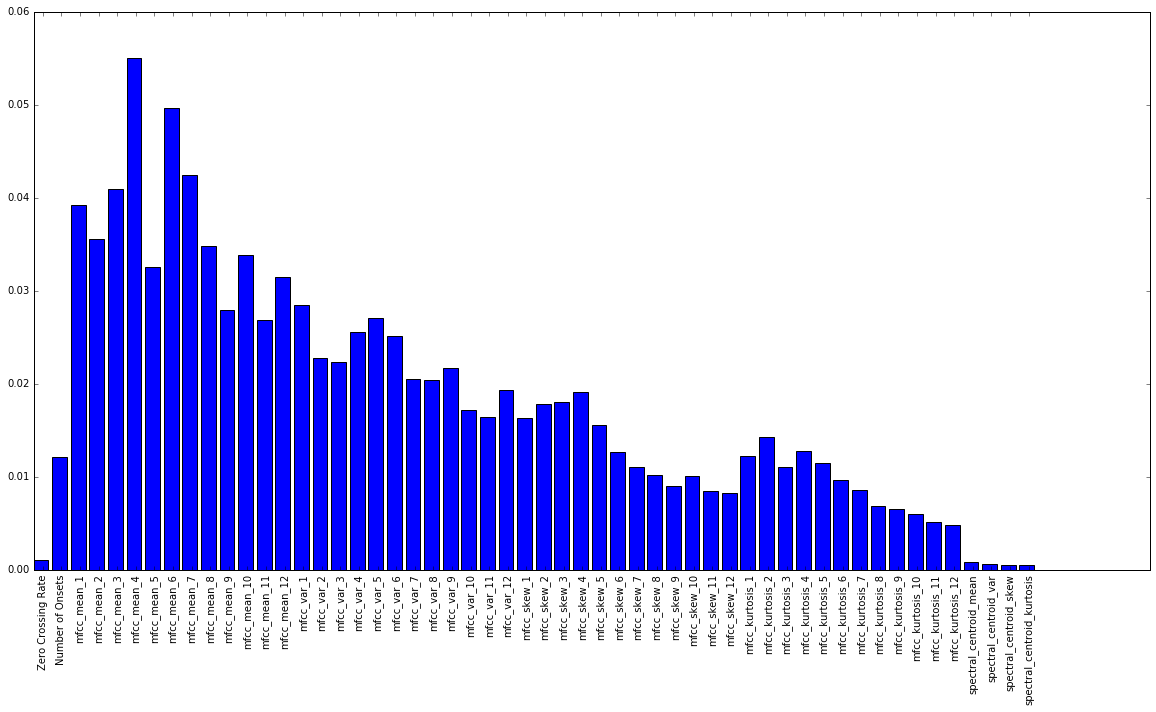

In [64]:
slim_generic,test_pred = generic_ml()

In [52]:
slim_generic

array([ 0.00074427,  0.01176472,  0.04305582,  0.03355958,  0.03437136,
        0.04738288,  0.03443426,  0.04015361,  0.04906566,  0.03962624,
        0.03302114,  0.02949637,  0.02618172,  0.03385937,  0.02985249,
        0.02377709,  0.02322544,  0.02524702,  0.02442904,  0.02802523,
        0.02053574,  0.01907071,  0.01867348,  0.01622191,  0.01682716,
        0.01895666,  0.01884943,  0.01934071,  0.01844986,  0.01840807,
        0.01352643,  0.0123902 ,  0.01245261,  0.01056706,  0.010563  ,
        0.00975416,  0.00845743,  0.00891311,  0.01443613,  0.01368416,
        0.01174915,  0.01263956,  0.01089017,  0.01048418,  0.00814316,
        0.00617951,  0.00657486,  0.00713162,  0.00631693,  0.0054472 ,
        0.00076514,  0.00074033,  0.00074443,  0.00084245])

In this project, it is used to clearly detect similar genres that are commonly misclassified together

In [66]:
confusion_matrix(y_test,test_pred).sum()

8000

In [76]:
test_arr = np.concatenate((y_test.values.reshape((len(y_test),1)),np.reshape(test_pred,(len(test_pred),1))),axis=1)
test_df= pd.DataFrame(test_arr,columns=['y_test','test_pred'])
print(test_df.shape)
test_df.head()

(8000, 2)


,y_test,test_pred
0,2,4
1,9,8
2,2,8
3,9,6
4,0,1


In [77]:
test_df['correct_output'] = test_df['y_test'] ==test_df['test_pred']
test_df.head()

,y_test,test_pred,correct_output
0,2,4,False
1,9,8,False
2,2,8,False
3,9,6,False
4,0,1,False


In [82]:
genre_pairs = {} 
for encoded_genre, genre in zip(original_encoded_order,original_genre_order):
    genre_pairs[encoded_genre] = genre
    
genre_pairs

{0: 'Electronic',
 1: 'Folk',
 2: 'Hip-Hop',
 3: 'Indie-Rock',
 4: 'Jazz',
 5: 'Old-Time',
 6: 'Pop',
 7: 'Psych-Rock',
 8: 'Punk',
 9: 'Rock'}

In [83]:
def checker(x):
    if x[0]==x[1]:
        return genre_pairs[x[0]]
    else :
        return 999999

In [84]:
test_df['individual_correct_predict'] = test_df.apply(checker,axis =1)
test_df.head()

,y_test,test_pred,correct_output,individual_correct_predict
0,2,4,False,999999
1,9,8,False,999999
2,2,8,False,999999
3,9,6,False,999999
4,0,1,False,999999


In [85]:
test_df['individual_correct_predict'].value_counts()

999999        5457
Old-Time       710
Hip-Hop        459
Folk           317
Electronic     313
Jazz           170
Punk           155
Psych-Rock     152
Indie-Rock      91
Rock            90
Pop             86
Name: individual_correct_predict, dtype: int64

In [86]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_df['y_test'].values,test_df['test_pred'].values), index = original_genre_order, columns=original_genre_order)
confusion_matrix_df


,Hip-Hop,Pop,Psych-Rock,Rock,Indie-Rock,Jazz,Electronic,Old-Time,Folk,Punk
Hip-Hop,313,83,142,41,71,4,45,18,54,29
Pop,66,317,54,62,132,46,47,29,11,36
Psych-Rock,93,46,459,37,15,0,55,51,28,16
Rock,116,151,104,91,66,17,85,72,43,55
Indie-Rock,183,121,112,44,170,0,82,45,21,22
Jazz,3,37,2,4,33,710,8,2,0,1
Electronic,131,99,158,97,61,10,86,67,37,54
Old-Time,82,147,26,108,80,1,35,152,86,83
Folk,67,80,16,115,42,5,52,189,155,79
Punk,97,92,37,110,60,0,63,113,138,90


In [90]:
def feature_importance_graph(feat_imp, col_length,col_names):
    importance = pd.DataFrame([feat_imp], columns = col_names)
 
    fig, ax = plt.subplots(figsize = (20,10))
    ax.bar(range(1,len(imp)+1), imp)
    ax.set_xticks(np.arange(0.4, col_length+0.4, 1))
    ax.set_xticklabels(importance.columns, rotation=90)

    return ax

out of bag error

In [37]:
oob = []
start = 10
stop = 200
oob_step_size = 10
for i in tqdm(range(start,stop, oob_step_size)):
    rf= RandomForestClassifier(n_estimators = i, max_features=0.33, max_depth=10, n_jobs=-1, oob_score=True)
    rf.fit(X_train, y_train)
    rf_train_pred = rf.predict(X_train)
    rf_test_pred = rf.predict(X_test)
    oob.append(1-rf.oob_score_)



  0%|          | 0/19 [00:00<?, ?it/s]


TypeError: __init__() got an unexpected keyword argument 'auto'

In [38]:
plt.plot(range(start, stop, oob_step_size), oob, '-')
plt.xlabel('Number of estimators')
plt.ylabel('Out of bags score')
plt.show()

NameError: name 'end' is not defined